# Color Bubbles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from mycolorpy import colorlist as mcp

In [2]:
rng = np.random.default_rng()

## Palette Generator

In [66]:
def fix_title(title):
    title = title.replace('_',' ')
    title = title[0].upper() + title[1:]
    space_index = title.find(' ')
    if space_index >= 0:
        first = title[:space_index]
        second = title[space_index+1:]
        second = second[0].upper() + second[1:]
        title = first + ' ' + second
    return title

['#00224e', '#7d7c78', '#fee838']
['#00224e', '#434e6c', '#7d7c78', '#bcae6c', '#fee838']
['#00224e', '#2a3f6d', '#575d6d', '#7d7c78', '#a59c74', '#d2c060', '#fee838']
['#00224e', '#1a386f', '#434e6c', '#61656f', '#7d7c78', '#9b9476', '#bcae6c', '#dec958', '#fee838']
['#00224e', '#083370', '#35456c', '#4f576c', '#666970', '#7d7c78', '#948e77', '#aea371', '#c8b866', '#e5cf52', '#fee838']


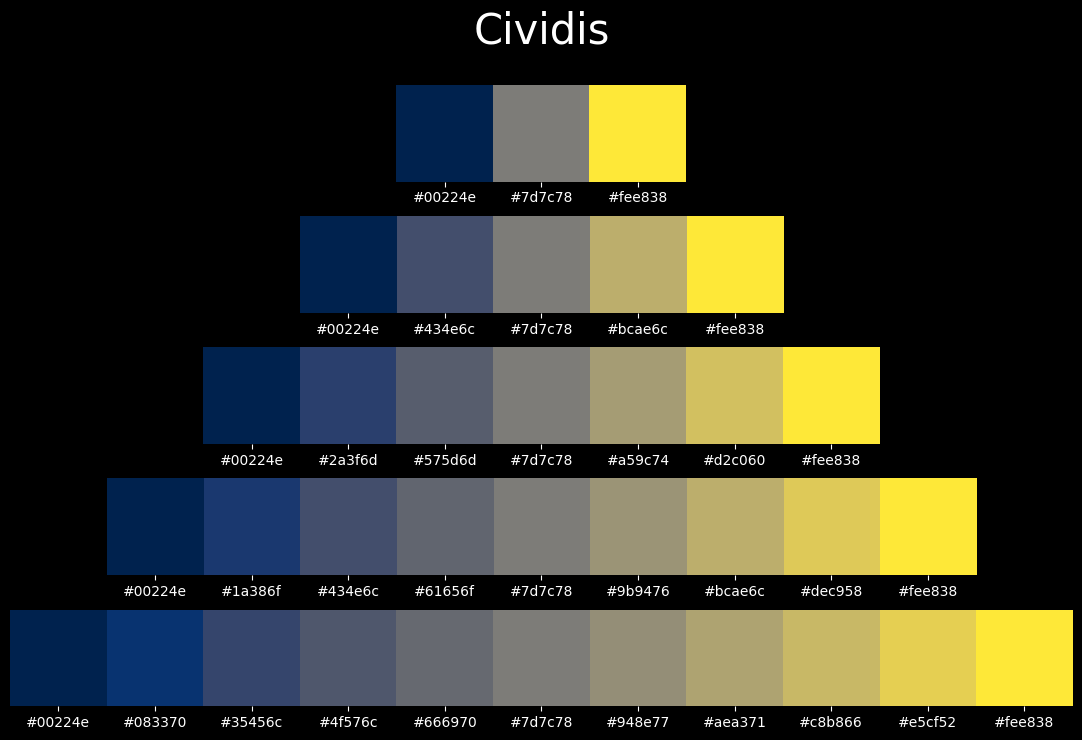

In [75]:
color_map = 'cividis'
num_colors = range(3,12,2)
num_palettes = len(num_colors)

fig, axes = plt.subplots(num_palettes, 1, 
                         figsize=(num_colors[-1]*1.5,num_palettes*1.5))
for plot_num, num_color in enumerate(num_colors):
    color_list = mcp.gen_color(cmap=color_map, n=num_color)
    axes[plot_num].imshow(to_rgba_array(color_list).reshape(1,num_color,4))
    axes[plot_num].spines[:].set_visible(False)
    axes[plot_num].set_xticks(range(num_color))
    axes[plot_num].set_xticklabels(color_list)
    axes[plot_num].set_yticks([])
    print(color_list)
fig.tight_layout()
fig.suptitle(fix_title(color_map), fontsize = 30)
fig.subplots_adjust(top=0.88)
plt.show()

## Palette Menu

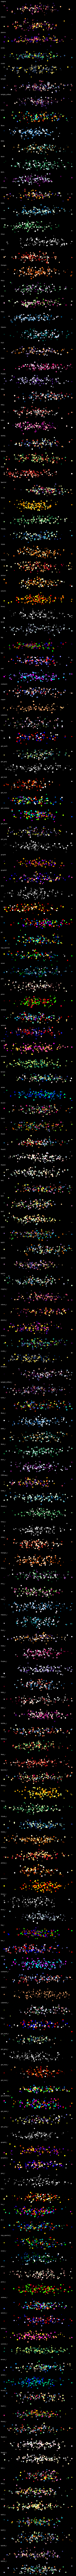

In [77]:
num_maps = len(plt.colormaps()) # 164 max
num_bubbles = 132
num_colors = 8
num_sizes = 8
size_step = 16
plot_width = 12
plot_height = 2.5

plt.style.use('dark_background')
fig, axes = plt.subplots(num_maps, 1, figsize=(plot_width, num_maps*plot_height))

for i, color_scale in enumerate(plt.colormaps()[:num_maps]):

    # Data
    x = np.random.normal(0, 3, num_bubbles).round(3)                                # +/-3 std from 0rigin
    y = np.random.normal(0, 3, num_bubbles).round(3)                                # +/-3 std from 0rigin
    sizes = (rng.integers(num_sizes, size=num_bubbles).astype('int') + 1)*size_step # size_step to size_step*num_sizes
    colors = rng.integers(num_colors, size=num_bubbles).astype('int')               # 0 to num_bubbles

    # Frame
    df = pd.DataFrame([x, y, sizes, colors]).T
    df.columns = ['Distance', 'Height', 'Size', 'Color']

    # Color
    scale_colors = dict(zip(range(num_colors), 
                            mcp.gen_color(cmap=color_scale, n=num_colors)))
    df['Color'] = df['Color'].map(scale_colors)

    # Plot
    axes[i].scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])
    axes[i].spines[:].set_visible(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(color_scale, loc='left')

#plt.savefig("colormaps.jpg",bbox_inches='tight')